# ６章：確率

現実世界の事象の不確実さを定量化する方法の1つとして確率を考えることが重要です。<br>
ここで確率P(E)は「事象Eの発生する確率」を表します。

Pythonで使用するライブラリをインポートしておきます。

In [84]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## 6.1 従属と独立

事象Eの発生に関する何らかの情報が事象Fの発生についての情報を与える場合、2つの事象E,Fは**従属関係**にあると言います。


In [25]:
# 1回目のトスでコインの表が出る確率
trial1 = 1/2
# 2回目のトスでコインの表が出る確率
trial2 = 1/2
print("コイントスで…")
print("1回目が表の確率は"+str(trial1)+"。")
print("2回目が表の確率は"+str(trial2)+"。")
print("これらは互いに独立です。")

コイントスで…
1回目が表の確率は0.5。
2回目が表の確率は0.5。
これらは互いに独立です。


In [26]:
print("1回目のトスで表が出たという情報を与えると…")
print("1回目が表の確率は"+str(trial1)+"。")
print("2回目も表の確率は"+str(trial2*trial2)+"。")
print("1回目も2回目も裏の確率は"+str(0*trial2)+"。")
print("これらは互いに従属です。")

1回目のトスで表が出たという情報を与えると…
1回目が表の確率は0.5。
2回目も表の確率は0.25。
1回目も2回目も裏の確率は0.0。
これらは互いに従属です。


## 6.2 条件付き確率

事象Gの条件下で事象Bが発生する確率は次の式で与えられ、条件付き確率の定義となります。

$$
P(B|G)=\frac{P(B,G)}{P(G)}
$$

**例題**

2人の子供（性別は不明）がいる家族を考えます。次のことを仮定します。

・子供がそれぞれ男の子か女の子である可能性は等しい。<br>
・2人目の子供の性別は、1人目の子供の性別とは独立している。

つまり、<br>
　→　女の子がいない確率：$\frac{1}{4}$<br>
　→　1人が女の子で1人が男の子である確率：$\frac{1}{2}$<br>
　→　2人とも女の子である確率：$\frac{1}{4}$<br>
となります。

このとき「1人目が女の子である」P(G)場合に、「2人目も女の子である」P(B)確率を条件付き確率で求めます。

$$
P(B|G)=\frac{P(B,G)}{P(G)}=\frac{P(B)}{P(G)}=\frac{1/4}{1/2}=\frac{1}{2}
$$

次に「少なくとも1人が女の子である」P(L)場合に、「2人とも女の子である」P(B)確率を条件付き確率で求めます。<br>
事象BかつL（「少なくとも1人が女の子である」かつ「2人とも女の子である」）は、事象Bと等しいので、次の式が成り立ちます。

$$
P(B|L)=\frac{P(B,L)}{P(L)}=\frac{P(B)}{P(L)}=\frac{1/4}{1/2+1/4}=\frac{1/4}{3/4}=\frac{1}{3}
$$

<u>これはどういうことでしょうか。</u><br>
少なくとも1人が女の子であった場合、2人とも女の子である場合よりも男の子と女の子が1人ずつである可能性は2倍（「少なくとも1人が女の子である」という条件のもとで、「2人とも女の子である」確率が$\frac{1}{3}$であるなら、「男の子と女の子が1人ずつ」である確率は、$\frac{2}{3}$であり、2倍）あるということになります。

家族構成を大量に生成して、この状況を確認します。

In [27]:
def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(2人とも女の子|1人目が女の子)：" + str(round(both_girls/older_girl, 3)) + "（≒1/2）")
print("P(2人とも女の子|どちらか1人が女の子)：" + str(round(both_girls/either_girl, 3)) + "（≒1/3）")

P(2人とも女の子|1人目が女の子)：0.501（≒1/2）
P(2人とも女の子|どちらか1人が女の子)：0.331（≒1/3）


## 6.3 ベイズの定理

事象Fが発生した状況で、それとは独立した事象Eが起きる確率を求めるとします。<br>
しかし事象Eが発生した状況で、事象Fの発生する確率だけが既知であるとします。<br>
条件付き確率の定義を使い、次の式を得ることができます。

$$P(E|F)=\frac{P(E,F)}{P(F)}=\frac{P(F|E)P(E)}{P(F)}$$

**例題**

10,000人当たり1人が発症する疾患があるとします。<br>
そしてこの疾患を99%の正確さで検出できる検査があるとします。

<u>検査の陽性が意味することは何でしょう。</u>

ここで、「検査結果が陽性である」事象をT、「疾患を持っている」事象をDとします。<br>
ベイズの定理では検査が陽性であった場合（P(T)）に、疾患を持っている確率（P(D)）は次の式となります。

$$
P(D|T)=\frac{P(T|D)P(D)}{P(T|D)P(D)+P(T|¬D)P(¬D)}
$$

ここで、疾患を持つ人が検査で陽性となる確率（P(T|D)）は0.99であることがわかっています。<br>
ある人が疾患を持つ確率（P(D)）は、$\frac{1}{10,000}=0.0001$。<br>
疾患を持っていないが、検査で陽性となる確率（P(T|¬D)）は、0.01。<br>
そして、ある人が疾患を持たない確率（P(¬D)）は、0.9999です。

これらの値を先ほどの式に代入すると、検査で要請が出た人が実際に疾患を持っている確率が分かります。


$$
P(D|T)=\frac{P(T|D)P(D)}{P(T|D)P(D)+P(T|¬D)P(¬D)}=\frac{0.99・0.0001}{0.99・0.0001+0.01・0.9999}
$$

In [75]:
print("検査で陽性が出た人が実際に疾患を持っている確率(P(D|T))は、" + str(round(100*(0.99*0.0001)/(0.99*0.0001+0.01*0.9999),2)) + "%です。")

検査で陽性が出た人が実際に疾患を持っている確率(P(D|T))は、0.98%です。


## 6.4 確率変数

確率変数とは、確率分布に関連づいた値を持つ変数です。

**例1**：Xを女の子の数を表す確率変数と考えます。

Xが0の場合は$\frac{1}{4}$、1の場合は$\frac{1}{2}$、2の場合は$\frac{1}{4}$となります。

**例2**：Yを2人のうち少なくとも1人が女の子であった場合の、女の子の数を表す確率変数と考えます。

Yが1の場合は$\frac{2}{3}$、2の場合は$\frac{1}{3}$となります。

**例3**：Zを1人目の子供が女の子であった場合の、女の子の数を表す確率変数と考えます。

Zが1の場合は$\frac{1}{2}$、2の場合は$\frac{1}{2}$となります。

## 6.5 連続確率分布

離散的な結果に対する正の確率に関連づけられる分布を、**離散型分布**と言います。例えばコイン投げが相当します。<br>
例えば一様分布は、0から1のすべての数に対して等しい重みを与えます。<br>
連続分布は**確率密度関数**(probability density function:pdf)で表現します。<br>
確率変数がある範囲の値をとる確率は、その範囲で確率密度関数を積分することで得られます。

一様分布の密度関数は次の関数で表します。

確率変数が-1の時の確率密度関数値は、0です。
確率変数が0.2の時の確率密度関数値は、1です。
確率変数が1.1の時の確率密度関数値は、0です。


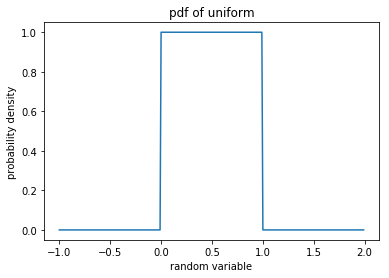

In [74]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

print("確率変数が-1の時の確率密度関数値は、" + str(uniform_pdf(-1)) + "です。")
print("確率変数が0.2の時の確率密度関数値は、" + str(uniform_pdf(0.2)) + "です。")
print("確率変数が1.1の時の確率密度関数値は、" + str(uniform_pdf(1.1)) + "です。")

x = np.arange(-1.0, 2.0, 0.01)
y = []
for i in x:
    y.append(uniform_pdf(i))
plt.plot(x,y)
plt.title("pdf of uniform")
plt.xlabel("random variable")         # 確率変数
plt.ylabel("probability density")     # 確率密度
plt.show()

確率変数の値がある値以下となる確率は、**累積分布関数**(cumulative distribution function:cdf)で表します。

一様分布の累積分布関数は次の関数で表します。

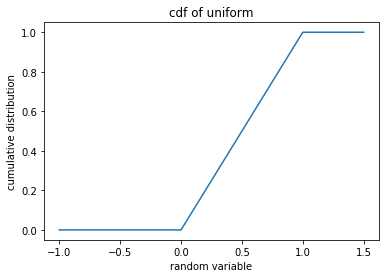

In [73]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is <=x"
    if x < 0: return 0    # 一様分布は0を下回らない
    elif x < 1: return x  # 例えば、P(X <= 0.4) = 0.4となる。
    else: return 1        # 一様分布は、最大で1

x = np.arange(-1.0, 2.0, 0.5)
y = []
for i in x:
    y.append(uniform_cdf(i))
plt.plot(x,y)
plt.title("cdf of uniform")
plt.xlabel("random variable")         # 確率変数
plt.ylabel("cumulative distribution") # 累積分布
plt.show()

## 6.6 正規分布

正規分布の確率密度変数は下記の式で表されます。
$$
f(x|μ,σ) = \frac{1}{σ\sqrt{2π}}exp\left(-\frac{(x-μ)^2}{2σ^2}\right)
$$


平均μと標準偏差σで表されます。<br>
μは釣鐘型の中心。σは釣鐘の横幅を表します。

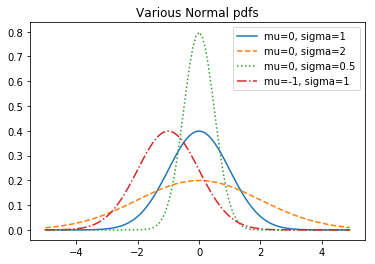

In [69]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)**2 / 2 / sigma**2)/(sqrt_two_pi * sigma))

xs = [x/10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label = 'mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label = 'mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label = 'mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label = 'mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

正規分布の**累積密度関数**は次の関数で表します。

In [70]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2 # 単純な方法ではcdfを書けないため、math.erfを使用

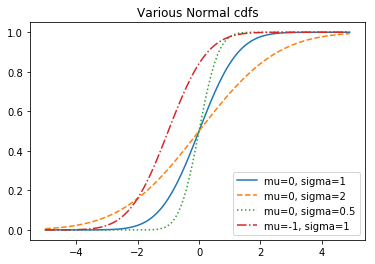

In [71]:
xs = [x/10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label = 'mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label = 'mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label = 'mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label = 'mu=-1, sigma=1')
plt.legend(loc=4)  # 凡例は右下
plt.title("Various Normal cdfs")
plt.show()

## 6.7 中心極限定理

中心極限定理とは、非常に多数の独立で同一の分布に従う確率変数の平均として定義される確率変数は、おおよそ正規分布になるというものです。<br>
これが、正規分布が有用であるという1つの理由です。

確率pで1、確率(1-p)で0となるn個の独立したベルヌーイ確率変数(p)を合計したものが、二項確率変数(n,p)です。

In [80]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

ベルヌーイ確率変数(p)の平均はp、標準偏差は$\sqrt{p(1-p)}$です。<br>
中心極限定理によれば、nが大きければ二項確率変数(n,p)はおおよそ平均μ=np、標準偏差$σ=\sqrt{np(1-p)}$の正規分布となります。

類似性を比較してみましょう。

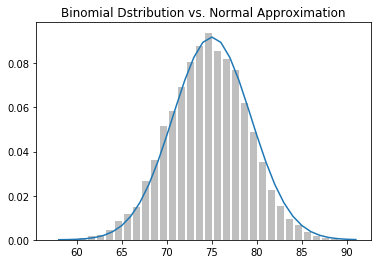

In [86]:
def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    # 二項分布を棒グラフでプロットする
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p*n
    sigma = math.sqrt(n*p*(1-p))
    
    # 正規分布の近似を折れ線グラフでプロットする
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Dstribution vs. Normal Approximation")
    plt.show()

make_hist(0.75, 100, 10000)

上記近似から得られる教訓で正規分布が有用な理由を説明します。<br>
歪みがないとされているコインを100回投げた際に表が60回以上出る確率を求めるには、正規分布(50, 5)が60以上となる確率を求めれば良いことになります。<br>
これは二項確率分布(100, 0.5)の累積分布関数を計算するよりも簡単です。

。。

>参考<br>
>[ゼロからはじめるデータサイエンス](https://www.amazon.co.jp/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9-%E2%80%95Python%E3%81%A7%E5%AD%A6%E3%81%B6%E5%9F%BA%E6%9C%AC%E3%81%A8%E5%AE%9F%E8%B7%B5-Joel-Grus/dp/4873117860/ref=cm_cr_arp_d_product_top?ie=UTF8)